## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Load Data

In [4]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df = diamonds_df.sample(n = 100)
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
45160,0.50,Premium,D,SI1,60.7,61.0,1654,5.12,5.09,3.10
15645,1.00,Premium,G,VS2,60.1,57.0,6272,6.42,6.35,3.84
5147,0.93,Very Good,I,VS2,63.1,58.0,3766,6.19,6.21,3.91
27995,0.30,Ideal,E,VS2,61.2,55.0,658,4.31,4.35,2.65
44237,0.51,Ideal,H,VS1,61.8,57.0,1573,5.11,5.14,3.16


## Line Plot


#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the data for the x-axis (must match a column in `data` if provided).<br>  
- **y**: string or array-like; the data for the y-axis (must match a column in `data` if provided).<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **style**: string (optional); group data by a categorical variable and assign distinct line styles.<br>  
- **size**: string (optional); group data by a categorical variable and assign distinct line thicknesses.<br>  
- **palette**: string or list of colors (optional); controls the colors used for different categories.<br>  
- **dashes**: Boolean or list (optional); controls the dashing of lines.<br>  
- **markers**: Boolean or list (optional); controls the marker style used in the plot.<br>  
- **legend**: string or boolean; determines the location or visibility of the legend.<br>  
- **ci**: int or “sd” or None; size of the confidence interval to draw.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  
- **alpha**: float; controls the transparency of the plot elements.<br>

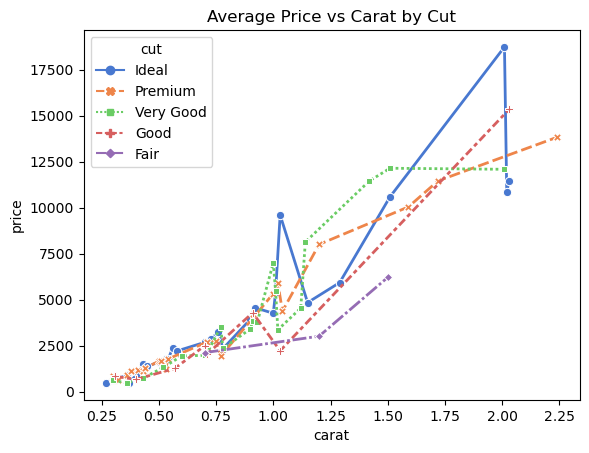

In [5]:
sns.lineplot(
    data=diamonds_df, 
    x="carat", 
    y="price", 
    hue="cut", 
    style="cut", 
    markers=True, 
    ci=None, 
    palette="muted", 
    linewidth=2
)

plt.title("Average Price vs Carat by Cut")
plt.show()

## Scatter Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the data for the x-axis (must match a column in `data` if provided).<br>  
- **y**: string or array-like; the data for the y-axis (must match a column in `data` if provided).<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **style**: string (optional); group data by a categorical variable and assign distinct marker styles.<br>  
- **size**: string or array-like (optional); group data by a categorical variable or set marker sizes.<br>  
- **palette**: string or list of colors (optional); controls the colors used for different categories.<br>  
- **sizes**: tuple (min, max); range for scaling marker sizes.<br>  
- **alpha**: float; controls the transparency of the plot elements.<br>  
- **legend**: string or boolean; determines the location or visibility of the legend.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  

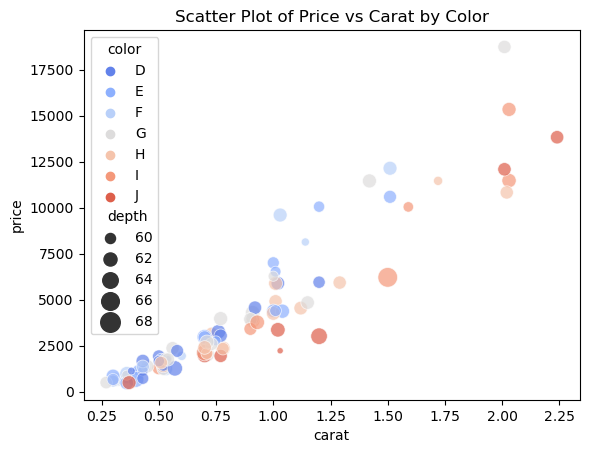

In [6]:
sns.scatterplot(
    data=diamonds_df, 
    x="carat", 
    y="price", 
    hue="color", 
    size="depth", 
    sizes=(20, 200), 
    alpha=0.7, 
    palette="coolwarm"
)

plt.title("Scatter Plot of Price vs Carat by Color")
plt.show()

## Histogram Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the data for the x-axis (must match a column in `data` if provided).<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **weights**: array-like (optional); weights for each sample.<br>  
- **stat**: string ('count', 'frequency', 'density', 'probability'); defines how bars represent data.<br>  
- **bins**: int or sequence; number of bins or their edges.<br>  
- **binwidth**: float; width of each bin (overrides `bins`).<br>  
- **binrange**: tuple (low, high); range for binning.<br>  
- **cumulative**: boolean; if True, compute cumulative counts.<br>  
- **multiple**: string ('layer', 'dodge', 'stack', 'fill'); how multiple distributions are handled.<br>  
- **shrink**: float; factor to adjust bar width.<br>  
- **fill**: boolean; if True, fill the bars.<br>  
- **element**: string ('bars', 'step', 'poly'); visual representation of the histogram.<br>  
- **palette**: string or list of colors; controls the colors used for different categories.<br>  
- **alpha**: float; controls the transparency of the plot elements.<br>  
- **legend**: string or boolean; determines the location or visibility of the legend.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  

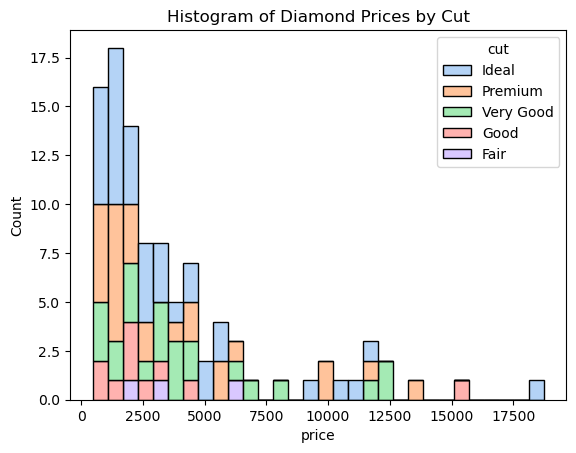

In [7]:
sns.histplot(
    data=diamonds_df, 
    x="price", 
    hue="cut", 
    bins=30, 
    multiple="stack", 
    palette="pastel", 
    alpha=0.8
)

plt.title("Histogram of Diamond Prices by Cut")
plt.show()

## Count Plot

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string (optional); categorical variable for the x-axis.<br>  
- **y**: string (optional); categorical variable for the y-axis (only one of `x` or `y` is required).<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **order**: list (optional); order to plot the categorical levels.<br>  
- **hue_order**: list (optional); order to plot the hue levels.<br>  
- **palette**: string or list of colors; controls the colors used for different categories.<br>  
- **orient**: string ('v' or 'h'); orientation of the plot (vertical or horizontal).<br>  
- **color**: matplotlib color; overrides the color for all bars.<br>  
- **saturation**: float; proportion of the original saturation for the bars.<br>  
- **dodge**: boolean; whether to separate bars for different hue levels.<br>  
- **lw**: float; width of the lines that outline the bars.<br>  
- **ec**: color; color of the edges of the bars.<br>  
- **hatch**: string; hatch pattern for the bars.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  

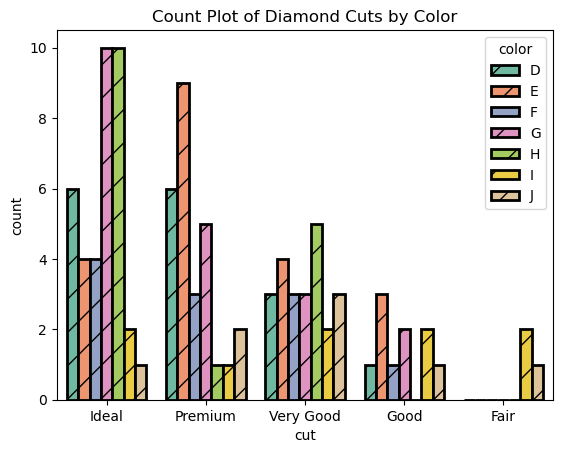

In [15]:
sns.countplot(
    data=diamonds_df, 
    x="cut", 
    hue="color", 
    palette="Set2", 
    saturation=0.8, 
    lw=2, 
    ec="black", 
    hatch="/"
)

plt.title("Count Plot of Diamond Cuts by Color")
plt.show()

## Box Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the categorical variable for the x-axis.<br>  
- **y**: string or array-like; the numerical variable for the y-axis.<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **palette**: string or list of colors; controls the colors used for different categories.<br>  
- **order**: list (optional); order of categorical levels to be plotted.<br>  
- **hue_order**: list (optional); order of hue levels to be plotted.<br>  
- **notch**: boolean; if True, create a notch in the box to show the confidence interval for the median.<br>  
- **whis**: float or string; determines the length of the whiskers. Default is 1.5, which extends to 1.5 times the IQR.<br>  
- **width**: float; width of the boxes.<br>  
- **fliersize**: float; size of the outlier points.<br>  
- **linewidth** (or lw): float; width of the lines that make the box.<br>  
- **dodge**: boolean; whether to separate boxes for different hue levels.<br>  
- **showmeans**: boolean; if True, shows the mean as a marker.<br>  
- **meanline**: boolean; if True, the mean marker is shown as a line.<br>  
- **showfliers**: boolean; whether to display the outliers.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  

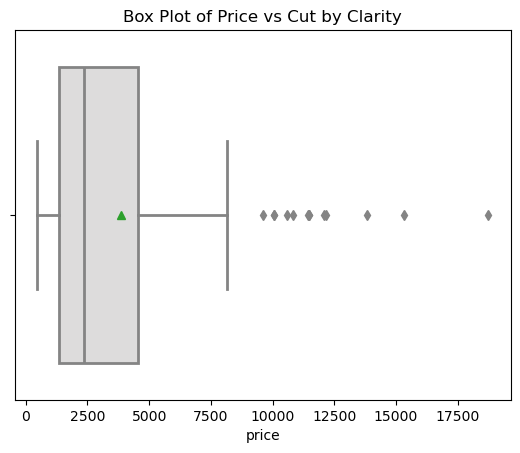

In [20]:
sns.boxplot(
    data=diamonds_df, 
    x="price", 
    palette="coolwarm", 
    linewidth=2, 
    showmeans=True
)

plt.title("Box Plot of Price vs Cut by Clarity")
plt.show()

## Joint Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the data for the x-axis (must match a column in `data` if provided).<br>  
- **y**: string or array-like; the data for the y-axis (must match a column in `data` if provided).<br>  
- **kind**: string ('scatter', 'reg', 'resid', 'kde', 'hex'); the type of plot to draw.<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **palette**: string or list of colors (optional); controls the colors used for different categories.<br>  
- **height**: float; size of the figure (in inches).<br>  
- **ratio**: float; ratio of the size of the marginal axes to the main plot.<br>  
- **space**: float; space between the main plot and the marginal axes.<br>  
- **dropna**: boolean; if True, removes missing values before plotting.<br>  
- **xlim**: tuple (low, high); limits for the x-axis.<br>  
- **ylim**: tuple (low, high); limits for the y-axis.<br>  
- **marginal_ticks**: boolean; whether to add ticks to marginal plots.<br>  
- **joint_kws**: dictionary; additional keyword arguments for the joint plot.<br>  
- **marginal_kws**: dictionary; additional keyword arguments for the marginal plots.<br>

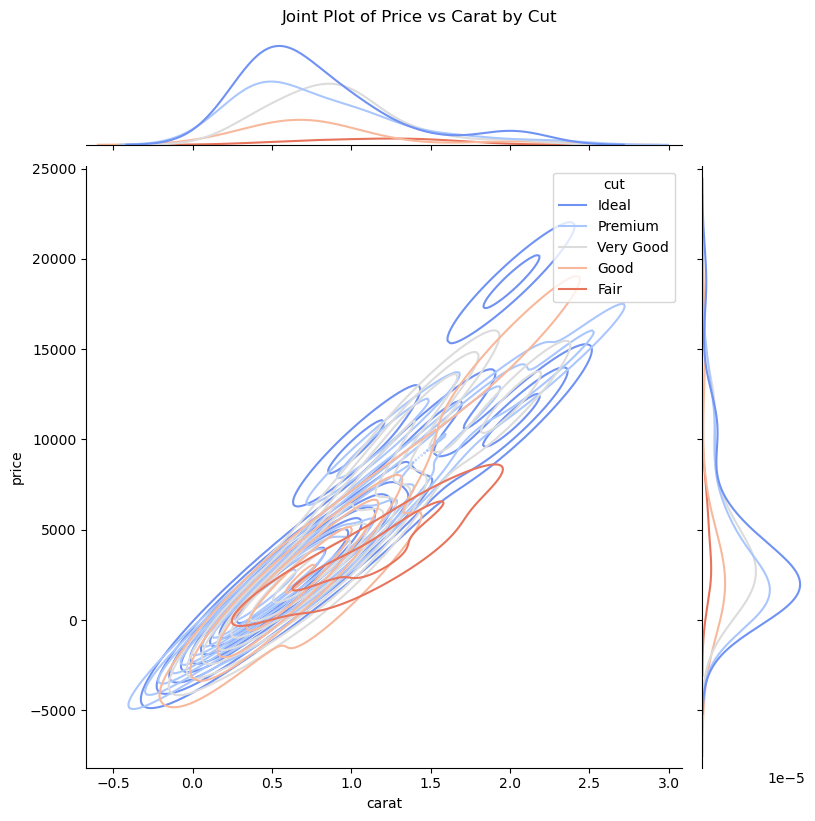

In [8]:
sns.jointplot(
    data=diamonds_df, 
    x="carat", 
    y="price", 
    kind="kde", 
    hue="cut", 
    height=8, 
    palette="coolwarm"
)

plt.suptitle("Joint Plot of Price vs Carat by Cut", y=1.02)
plt.show()

## Violin Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variables to be plotted.<br>  
- **x**: string or array-like; the categorical variable for the x-axis.<br>  
- **y**: string or array-like; the numerical variable for the y-axis.<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **palette**: string or list of colors; controls the colors used for different categories.<br>  
- **order**: list (optional); order of categorical levels to be plotted.<br>  
- **hue_order**: list (optional); order of hue levels to be plotted.<br>  
- **split**: boolean; if True, splits the violins for each level of the hue variable.<br>  
- **inner**: string ('box', 'quart', 'point', 'stick', or None); determines the type of plot inside the violins.<br>  
- **bw**: float; bandwidth for kernel density estimation, controlling the smoothness of the violins.<br>  
- **cut**: float; determines how far the violins extend beyond the extreme data points.<br>  
- **scale**: string ('area', 'count', 'width'); scaling of the width of the violins.<br>  
- **scale_hue**: boolean; if True, scales the width of the violins according to the hue variable.<br>  
- **linewidth** (or lw): float; width of the line separating the violins.<br>  
- **dodge**: boolean; whether to separate violins for different hue levels.<br>  
- **showmeans**: boolean; if True, shows the mean as a marker.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>  

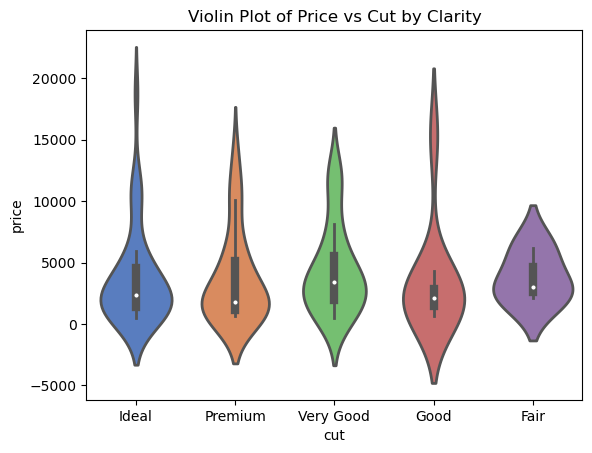

In [25]:
sns.violinplot(
    data=diamonds_df, 
    x="cut", 
    y="price", 
    palette="muted", 
    scale="area", 
    linewidth=2
)

plt.title("Violin Plot of Price vs Cut by Clarity")
plt.show()

## KDE Plot  

#### Common Parameters:<br>  
- **data**: DataFrame, array, or list of arrays; the dataset containing the variable to be plotted.<br>  
- **x**: string or array-like; the data for the x-axis (variable to plot).<br>  
- **y**: string or array-like (optional); the data for the y-axis (for multivariate data).<br>  
- **hue**: string (optional); group data by a categorical variable and assign distinct colors.<br>  
- **shade**: boolean; if True, shade the area under the KDE curve.<br>  
- **shade_lowest**: boolean; if True, shades the lowest contour.<br>  
- **cumulative**: boolean; if True, displays the cumulative distribution.<br>  
- **bw**: float or string; bandwidth for kernel density estimation (controls the smoothness).<br>  
- **kernel**: string ('gau', 'cos', 'biw', 'epa', 'tri', 'triw'); kernel function to use for KDE.<br>  
- **cut**: float; determines how far to extend the KDE curve beyond the data range.<br>  
- **clip**: tuple of (xmin, xmax); limits the range of the data.<br>  
- **color**: matplotlib color; color of the KDE plot.<br>  
- **label**: string; label for the plot legend.<br>  
- **linewidth** (or lw): float; width of the line representing the KDE.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the graph.<br>

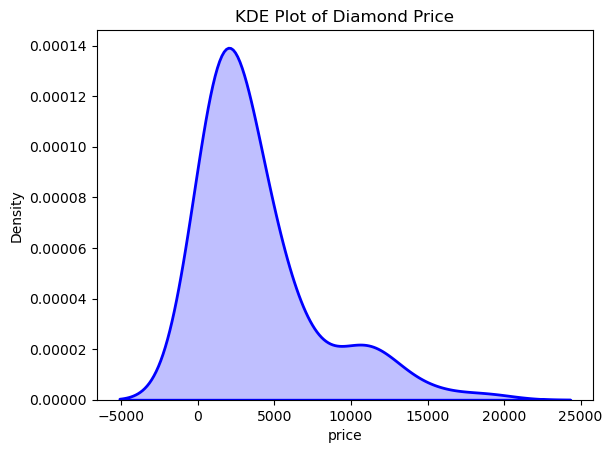

In [26]:
sns.kdeplot(
    data=diamonds_df, 
    x="price", 
    shade=True, 
    color="blue", 
    bw=0.5, 
    linewidth=2
)

# Show the plot
plt.title("KDE Plot of Diamond Price")
plt.show()

## Heatmap Plot  

#### Common Parameters:<br>  
- **data**: 2D array-like or DataFrame; the dataset to visualize.<br>  
- **cmap**: string or colormap; the colormap to use for the heatmap.<br>  
- **annot**: boolean; if True, annotates each cell with its value.<br>  
- **fmt**: string; format string for the annotations.<br>  
- **linewidths**: float; width of the lines that will divide each cell.<br>  
- **linecolor**: string; color of the lines separating the cells.<br>  
- **vmin**: float; minimum value for color scaling.<br>  
- **vmax**: float; maximum value for color scaling.<br>  
- **center**: float; value at which to center the colormap.<br>  
- **mask**: boolean array; if True, mask values will not be displayed.<br>  
- **square**: boolean; if True, make the axes square-shaped.<br>  
- **xticklabels**: bool or int; if True, label the x-axis with variable names.<br>  
- **yticklabels**: bool or int; if True, label the y-axis with variable names.<br>  
- **cbar**: boolean; whether to display the colorbar.<br>  
- **cbar_kws**: dictionary; arguments for the colorbar.<br>  
- **ax**: Matplotlib axes object; axes on which to plot the heatmap.<br>  

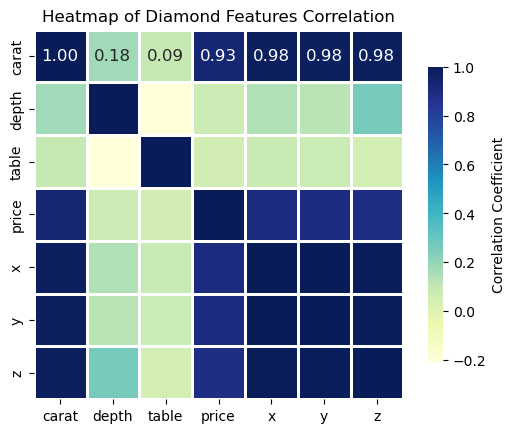

In [34]:
corr = diamonds_df.select_dtypes(include=np.number).corr()

sns.heatmap(
    data=corr, 
    cmap="YlGnBu",  # Choose a more visually appealing colormap
    annot=True,  # Annotate each cell
    fmt=".2f",  # Format annotations
    linewidths=0.8,  # Slightly thicker lines to define cells
    linecolor="white",  # White cell lines for better contrast
    cbar=True,  # Display colorbar
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},  # Colorbar settings
    annot_kws={"size": 12},  # Increase annotation size
    square=True,  # Keep axes square-shaped
    mask=None,  # No masking
    xticklabels=True,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
)

plt.title("Heatmap of Diamond Features Correlation")
plt.show()

## Pair Plot  

#### Common Parameters:<br>  
- **data**: DataFrame; the dataset to visualize.<br>  
- **hue**: string (optional); variable in the dataset to group the data by, with different colors for each group.<br>  
- **vars**: list of strings (optional); the variables to include in the plot. If not specified, all numerical variables are plotted.<br>  
- **kind**: string ('scatter', 'kde', or 'hist'); the type of plot to use for the off-diagonal subplots.<br>  
- **palette**: string or list of colors; controls the colors used for different hue levels.<br>  
- **diag_kind**: string ('auto', 'hist', 'kde'); the type of plot to use on the diagonal.<br>  
- **markers**: string or list; marker style for scatter plots (default is 'o').<br>  
- **height**: float; height (in inches) of each facet.<br>  
- **aspect**: float; aspect ratio of each facet (width/height).<br>  
- **dropna**: boolean; whether to exclude missing values in the plot.<br>  
- **plot_kws**: dictionary; additional arguments passed to the individual plot functions.<br>  
- **diag_sharey**: boolean; if True, the y-axis limits for the diagonal plots will be shared.<br>  
- **corner**: boolean; if True, does not plot the upper (off-diagonal) part of the pair plot.<br>  
- **height**: float; the height of each facet in the pair plot.<br>  
- **aspect**: float; aspect ratio of each facet.<br>  

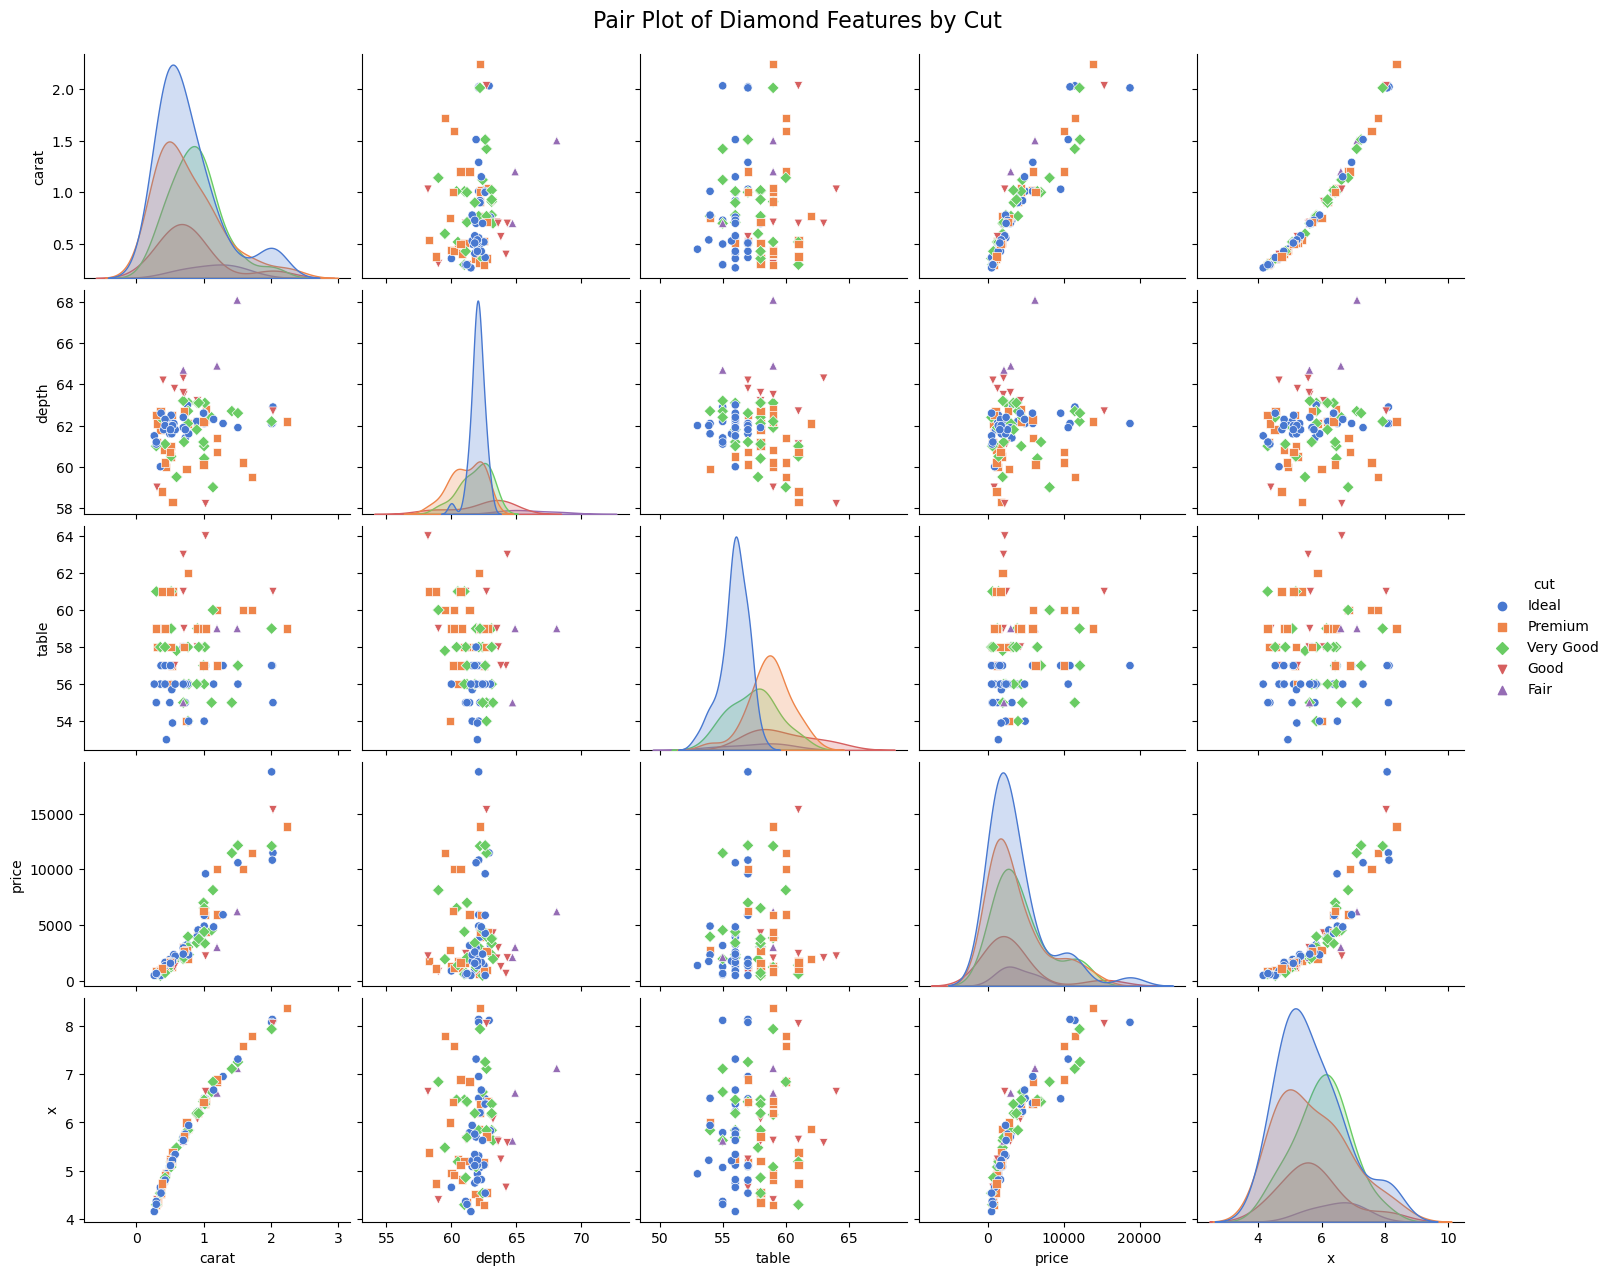

In [38]:
sns.pairplot(
    data=diamonds_df.iloc[:,:-2], 
    hue="cut", 
    palette="muted", 
    kind="scatter", 
    height=2.5, 
    aspect=1.2, 
    markers=["o", "s", "D", "v", "^"], 
    diag_kind="kde"
)

# Show the plot
plt.suptitle("Pair Plot of Diamond Features by Cut", size=16, y=1.02)
plt.show()

## Regression Plot  

#### Common Parameters:<br>  
- **data**: DataFrame; the dataset containing the variables to plot.<br>  
- **x**: string or array-like; the variable for the x-axis.<br>  
- **y**: string or array-like; the variable for the y-axis.<br>  
- **hue**: string (optional); variable to group the data by, with different colors for each group.<br>  
- **fit_reg**: boolean; if True, a regression line is plotted. Default is True.<br>  
- **scatter_kws**: dictionary; additional arguments passed to the scatter plot.<br>  
- **line_kws**: dictionary; additional arguments passed to the regression line.<br>  
- **ci**: integer or string ('sd', 'pearson'); size of the confidence interval for the regression line.<br>  
- **logistic**: boolean; if True, fits a logistic regression curve.<br>  
- **robust**: boolean; if True, uses a robust regression method.<br>  
- **aspect**: float; aspect ratio of the plot.<br>  
- **height**: float; height (in inches) of the plot.<br>  

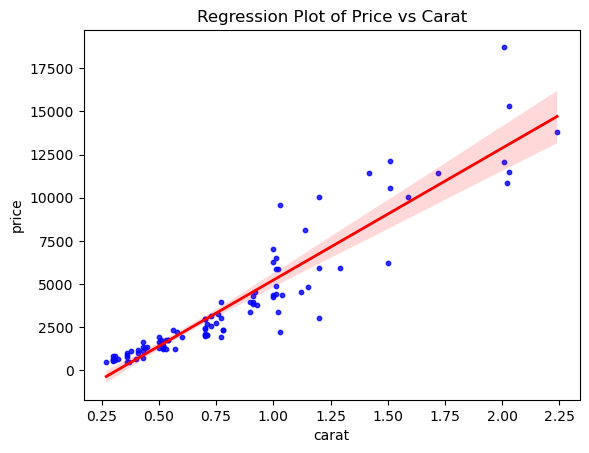

In [37]:
sns.regplot(
    data=diamonds_df, 
    x="carat", 
    y="price", 
    scatter_kws={"color": "blue", "s": 10}, 
    line_kws={"color": "red", "lw": 2}, 
    fit_reg=True, 
    ci=95
)

plt.title("Regression Plot of Price vs Carat")
plt.show()